In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from pydataset import data

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

import wrangle_lugo as wl

In [2]:
df = wl.get_wine_data()

In [3]:
df = wl.prep_wine_data(df)

In [4]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,wine_type,wine_type_white_wine
0,8.9,0.220,0.48,1.8,0.077,29.0,60.0,0.9968,3.39,0.53,9.4,6,red_wine,0
1,6.3,0.390,0.16,1.4,0.080,11.0,23.0,0.9955,3.34,0.56,9.3,5,red_wine,0
2,7.6,0.410,0.24,1.8,0.080,4.0,11.0,0.9962,3.28,0.59,9.5,5,red_wine,0
3,6.9,0.605,0.12,10.7,0.073,40.0,83.0,0.9993,3.45,0.52,9.4,6,red_wine,0
4,8.1,0.380,0.28,2.1,0.066,13.0,30.0,0.9968,3.23,0.73,9.7,7,red_wine,0


In [5]:
tr, val, ts = wl.get_split(df)

In [6]:
target = 'quality'

In [7]:
X_tr, X_val, X_ts, y_tr, y_val, y_ts, to_scale, baseline = wl.get_Xs_ys_to_scale_baseline(tr, val, ts, target)

In [8]:
baseline

5.931135531135531

## Clustering with the wine_quality dataset

* Using this lesson as a guide, perform clustering on the wine_quality dataset.

* Choose features other than the ones used in the lesson.

* Visualize the results of your clustering.
* Use the elbow method to visually select a good value for k.

In [9]:
X = tr[['density', 'chlorides']]

In [10]:
#Fit a new model to my scaled data

# MAKE the thing
kmeans_scale = KMeans(2)

# FIT the thing
kmeans_scale.fit(X)

# USE the thing
kmeans_scale.predict(X)

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [11]:
X['cluster'] = kmeans_scale.predict(X)

In [12]:
X

,density,chlorides,cluster
1377,0.98960,0.041,0
2596,0.99924,0.038,0
3016,0.99123,0.042,0
3852,0.99123,0.046,0
1507,0.99440,0.034,0
...,...,...,...
4537,0.99492,0.048,1
350,0.99120,0.038,0
1305,0.99460,0.030,0
4343,0.98975,0.036,0


<AxesSubplot:xlabel='density', ylabel='chlorides'>

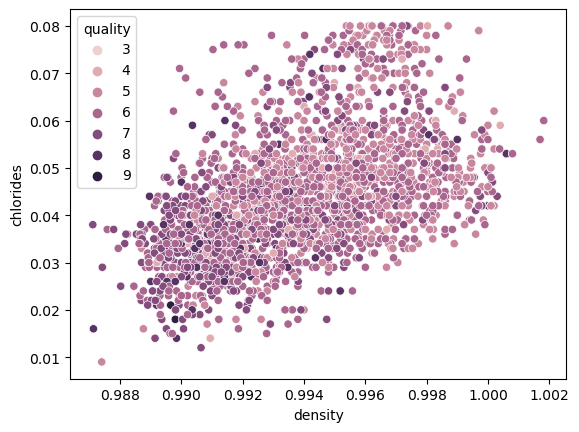

In [13]:
# Select the columns for the scatter plot
X = tr[['density', 'chlorides']]

# Add the 'species' column to the selected columns
X['quality'] = tr['quality']

# Create a scatter plot with hue by 'species'
sns.scatterplot(x='density', y='chlorides', hue='quality', data=X)

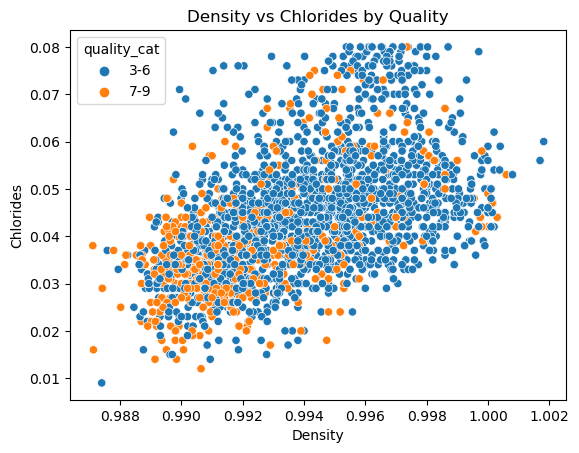

In [14]:
# bin the 'quality' variable as 3-6 and 7-9
tr['quality_cat'] = pd.cut(tr['quality'], bins=[2, 6, 9], labels=['3-6', '7-9'])

# select the columns for the scatter plot
X = tr[['density', 'chlorides', 'quality_cat']]

# create a scatter plot with different colors for each quality level
sns.scatterplot(x='density', y='chlorides', hue='quality_cat', data=X)
plt.xlabel('Density')
plt.ylabel('Chlorides')
plt.title('Density vs Chlorides by Quality')
plt.show()

In [16]:
X = tr[['density', 'chlorides', 'quality']]

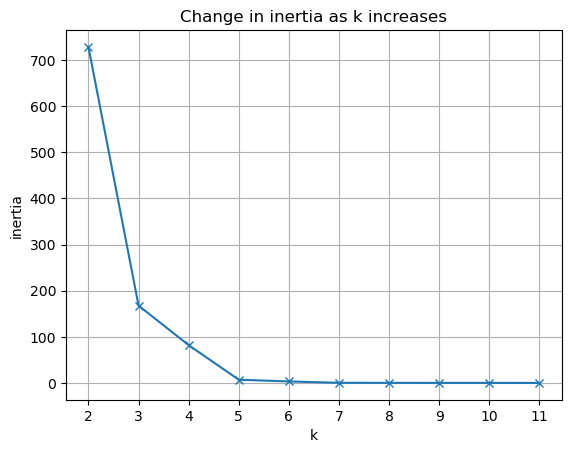

In [17]:
# lets plot inertia vs k
pd.Series(
    {k: KMeans(k, random_state=123, n_init=10)\
     .fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
plt.xticks(range(2, 12))
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Change in inertia as k increases')
plt.grid()

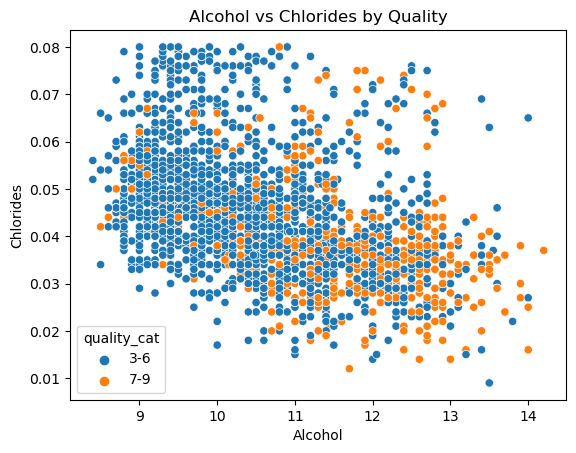

In [18]:
# bin the 'quality' variable as 3-6 and 7-9
tr['quality_cat'] = pd.cut(tr['quality'], bins=[2, 6, 9], labels=['3-6', '7-9'])

# select the columns for the scatter plot
X = tr[['alcohol', 'chlorides', 'quality_cat']]

# create a scatter plot with different colors for each quality level
sns.scatterplot(x='alcohol', y='chlorides', hue='quality_cat', data=X)
plt.xlabel('Alcohol')
plt.ylabel('Chlorides')
plt.title('Alcohol vs Chlorides by Quality')
plt.show()

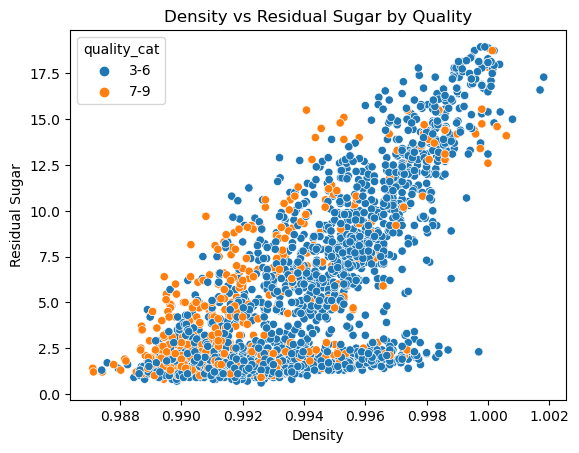

In [17]:
# bin the 'quality' variable as 3-6 and 7-9
tr['quality_cat'] = pd.cut(tr['quality'], bins=[2, 6, 9], labels=['3-6', '7-9'])

# select the columns for the scatter plot
X = tr[['density', 'residual_sugar', 'quality_cat']]

# create a scatter plot with different colors for each quality level
sns.scatterplot(x='density', y='residual_sugar', hue='quality_cat', data=X)
plt.xlabel('Density')
plt.ylabel('Residual Sugar')
plt.title('Density vs Residual Sugar by Quality')
plt.show()

In [18]:
X

,density,residual_sugar,quality_cat
1377,0.98960,2.7,7-9
2596,0.99924,16.3,3-6
3016,0.99123,6.6,7-9
3852,0.99123,1.5,3-6
1507,0.99440,6.8,7-9
...,...,...,...
4537,0.99492,8.3,3-6
350,0.99120,2.9,7-9
1305,0.99460,6.3,3-6
4343,0.98975,2.8,3-6
